In [1]:
import sys
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


sys.path.append("../")
from Datasets.DataCreation import getDatasetV1, getDatasetV2

In [2]:
df = getDatasetV1(None)
df.drop(columns=['year', 'district'], inplace=True)

In [3]:
df

,mean_temp,mean_total_snow,mean_total_precip,mean_snow_on_grnd,mean_total_rain,has_ergot
0,0.451735,0.303979,1.189348,6.005903,0.529384,False
1,4.239744,0.116534,0.871078,0.860822,0.328105,False
2,1.628772,0.155237,0.790694,3.564932,0.250507,True
3,3.060292,0.135583,1.299196,1.054999,0.332711,True
4,2.796575,0.010502,0.908037,0.010959,0.078265,True
...,...,...,...,...,...,...
1059,0.777808,0.000000,1.151507,14.356164,0.000000,True
1060,2.653288,0.000000,1.097808,6.519178,0.000000,True
1061,1.931507,0.000000,2.099726,5.945205,0.000000,True
1062,1.386849,0.000000,1.102466,5.210959,0.000000,True


In [4]:
X = df.drop(columns=["has_ergot"])
y = df['has_ergot']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train

,mean_temp,mean_total_snow,mean_total_precip,mean_snow_on_grnd,mean_total_rain
56,0.154795,0.112877,1.601507,0.000000,1.488630
632,1.638493,0.000000,1.018493,4.775342,0.000000
345,4.386679,0.185128,1.200829,0.999108,0.691819
887,3.638767,0.000000,0.870959,9.760731,0.000000
54,0.236393,0.204178,1.006849,2.337215,0.805274
...,...,...,...,...,...
847,3.019178,0.000000,0.868767,3.523288,0.000000
715,0.779178,0.000000,0.924110,5.712329,0.000000
905,0.667397,0.000000,0.705205,4.186301,0.000000
235,6.008826,0.131742,0.475303,0.180871,0.343601


In [8]:
model = KNeighborsClassifier(n_neighbors=1)

In [9]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = model.predict(X_test_scaled)

In [11]:
accuracy_score(y_test, y_pred)

0.6995305164319249

In [12]:
def result(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)

    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    print("Accuracy: ", accuracy)

    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    print("Precision: ", precision)

    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    print("Recall: ", recall)

    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1 Score: ", f1_score)

In [16]:
score = []

for i in range(1,25):
    print("--------------------------------------")
    print(f"K value = {i}")
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    result(y_test, y_pred)

    score.append(accuracy_score(y_test, y_pred))

--------------------------------------
K value = 1
Accuracy:  0.6995305164319249
Precision:  0.834319526627219
Recall:  0.7966101694915254
F1 Score:  0.815028901734104
--------------------------------------
K value = 2
Accuracy:  0.6384976525821596
Precision:  0.8676470588235294
Recall:  0.6666666666666666
F1 Score:  0.7539936102236422
--------------------------------------
K value = 3
Accuracy:  0.7464788732394366
Precision:  0.8360655737704918
Recall:  0.864406779661017
F1 Score:  0.85
--------------------------------------
K value = 4
Accuracy:  0.704225352112676
Precision:  0.8475609756097561
Recall:  0.7853107344632768
F1 Score:  0.81524926686217
--------------------------------------
K value = 5
Accuracy:  0.7793427230046949
Precision:  0.8385416666666666
Recall:  0.9096045197740112
F1 Score:  0.8726287262872628
--------------------------------------
K value = 6
Accuracy:  0.7652582159624414
Precision:  0.8469945355191257
Recall:  0.8757062146892656
F1 Score:  0.8611111111111112


In [17]:
score

[0.6995305164319249,
 0.6384976525821596,
 0.7464788732394366,
 0.704225352112676,
 0.7793427230046949,
 0.7652582159624414,
 0.8075117370892019,
 0.7934272300469484,
 0.8262910798122066,
 0.8262910798122066,
 0.8356807511737089,
 0.8403755868544601,
 0.8309859154929577,
 0.8450704225352113,
 0.8403755868544601,
 0.8450704225352113,
 0.8403755868544601,
 0.8450704225352113,
 0.8356807511737089,
 0.8497652582159625,
 0.8403755868544601,
 0.8356807511737089,
 0.8356807511737089,
 0.8403755868544601]

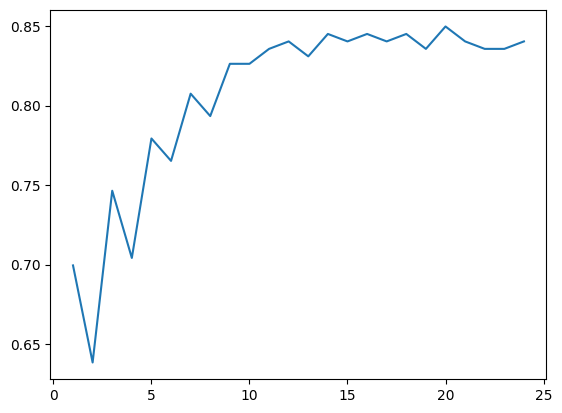

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1,25), score)